`CPCB :` https://cpcb.nic.in/

1. `Timestamp`: The date and time of measurement.
2. `PM2.5 (µg/m³)`: Particulate Matter ≤ 2.5 µm.
3. `PM10 (µg/m³)`: Particulate Matter ≤ 10 µm.
4. `NO2 (µg/m³)`: Nitrogen Dioxide.
5. `SO2 (µg/m³)`: Sulfur Dioxide.
6. `CO (mg/m³)`: Carbon Monoxide.
7. `Ozone (µg/m³)`: Ozone concentration.
8. `Location`: The location where the measurements were taken.

* PM10 (Particulate Matter ≤ 10 µm) → Coarse particles like dust, pollen, and ash.* 
PM2.5 (Particulate Matter ≤ 2.5 µm) → Fine particles from combustion, vehicle emissions, and industrial pollution.

* I considered only 6 columns (PM2.5, PM10, NO2, SO2, CO, and Ozone) because these are the primary pollutants used in AQI calculation by CPCB (India).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import matplotlib.image as mpimg

# Data Preparation: Loading & Handling Missing Values

In [2]:
# Fetch all file names in DATA-2023 Folder
files_names = os.listdir('DATA-2023/')

In [3]:
locations = [files_names[i].split('-')[0] for i in range(len(files_names))]

In [4]:
locations

['alipur',
 'anandVihar',
 'ashokVihar',
 'ayaNagar',
 'bawana',
 'chandniChowk',
 'crri',
 'dtu',
 'dwarkaSector8',
 'igiAirport',
 'ito',
 'jahangirpuri',
 'javaharlalNehruStadium',
 'mandirMarg',
 'mundka',
 'najafgarh',
 'narela',
 'nehruNagar',
 'okhla',
 'patparganj',
 'punjabiBagh',
 'pusa',
 'rohini',
 'shadipur',
 'sirifort',
 'soniaVihar',
 'vivekVihar',
 'wazirpur']

In [5]:
df=[]
for i in range(len(os.listdir('DATA-2023/'))):
    filename = files_names[i]
    df.append(pd.read_csv('DATA-2023/'+filename))

In [6]:
len(df)

28

In [7]:
i=0
for dataframe in df:
    dataframe['Location'] = locations[i]
    i+=1

In [8]:
# Get List Of Columns
df[0].columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'Location'],
      dtype='object')

In [9]:
# Drop unwanted columns
for dataframe in df:
    dataframe.drop(columns=['Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)','NOx (ppb)','NH3 (µg/m³)','NO (µg/m³)'],
                  inplace=True)

In [10]:
# Check available columns
df[0].columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)',
       'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Location'],
      dtype='object')

In [11]:
# Convert Timestamp column into dateTime
for dataframe in df:
    dataframe['Timestamp'] = pd.to_datetime(dataframe['Timestamp'])

In [12]:
df[0]['Timestamp'].dtype

dtype('<M8[ns]')

In [13]:
# Concate different dataframes in one dataframe
data = pd.concat([dataframe for dataframe in df],ignore_index=True)

In [14]:
data

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Location
0,2023-01-01 00:00:00,134.00,174.00,29.925,5.650000,0.875000,4.475,alipur
1,2023-01-01 01:00:00,112.00,138.00,26.425,5.625000,0.800000,3.800,alipur
2,2023-01-01 02:00:00,103.00,134.00,31.700,6.200000,0.800000,3.100,alipur
3,2023-01-01 03:00:00,114.00,139.00,29.100,5.450000,0.925000,2.600,alipur
4,2023-01-01 04:00:00,136.00,169.00,25.900,5.666667,1.000000,2.775,alipur
...,...,...,...,...,...,...,...,...
245275,2023-12-31 19:00:00,277.25,467.25,87.525,8.766667,0.975000,7.325,wazirpur
245276,2023-12-31 20:00:00,257.50,412.00,80.025,8.800000,0.675000,10.300,wazirpur
245277,2023-12-31 21:00:00,238.75,372.75,73.575,8.725000,0.600000,10.175,wazirpur
245278,2023-12-31 22:00:00,227.25,342.75,68.950,8.000000,0.433333,9.725,wazirpur


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245280 entries, 0 to 245279
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      245280 non-null  datetime64[ns]
 1   PM2.5 (µg/m³)  225988 non-null  float64       
 2   PM10 (µg/m³)   225366 non-null  float64       
 3   NO2 (µg/m³)    225725 non-null  float64       
 4   SO2 (µg/m³)    199513 non-null  float64       
 5   CO (mg/m³)     222448 non-null  float64       
 6   Ozone (µg/m³)  225070 non-null  float64       
 7   Location       245280 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 15.0+ MB


In [16]:
data.isnull().sum()

Timestamp            0
PM2.5 (µg/m³)    19292
PM10 (µg/m³)     19914
NO2 (µg/m³)      19555
SO2 (µg/m³)      45767
CO (mg/m³)       22832
Ozone (µg/m³)    20210
Location             0
dtype: int64

In [20]:
# Filling Missing data
for f in data:
    if data[f].isnull().sum():
        data[f] = data[f].ffill().bfill()


In [21]:
data.isnull().sum()

Timestamp        0
PM2.5 (µg/m³)    0
PM10 (µg/m³)     0
NO2 (µg/m³)      0
SO2 (µg/m³)      0
CO (mg/m³)       0
Ozone (µg/m³)    0
Location         0
dtype: int64

In [23]:
data.describe().round(2)

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
count,245280,245280.00,245280.00,245280.00,245280.00,245280.00,245280.00
mean,2023-07-02 11:30:00,101.99,216.15,35.73,9.38,1.34,25.81
min,2023-01-01 00:00:00,0.10,0.17,0.01,0.02,0.00,0.01
25%,2023-04-02 05:45:00,35.71,105.25,13.91,3.72,0.67,6.82
50%,2023-07-02 11:30:00,65.50,177.50,25.25,6.95,1.05,15.85
75%,2023-10-01 17:15:00,139.25,284.00,45.40,13.30,1.64,33.28
max,2023-12-31 23:00:00,1000.00,1000.00,498.90,199.90,26.00,200.00
std,NaN,97.62,150.83,36.97,10.11,1.11,28.86


In [241]:
# Save This DataFrame In Form Of CSV file.
data.to_csv('all data/complete_data.csv', index=False)

In [24]:
# Load The Data File
data = pd.read_csv('all data/complete_data.csv')

In [25]:
data.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Location
0,2023-01-01 00:00:00,134.0,174.0,29.925,5.650000,0.875,4.475,alipur
1,2023-01-01 01:00:00,112.0,138.0,26.425,5.625000,0.800,3.800,alipur
2,2023-01-01 02:00:00,103.0,134.0,31.700,6.200000,0.800,3.100,alipur
3,2023-01-01 03:00:00,114.0,139.0,29.100,5.450000,0.925,2.600,alipur
4,2023-01-01 04:00:00,136.0,169.0,25.900,5.666667,1.000,2.775,alipur


In [26]:
data['Timestamp']=pd.to_datetime(data['Timestamp'])

In [27]:
data.dtypes

Timestamp        datetime64[ns]
PM2.5 (µg/m³)           float64
PM10 (µg/m³)            float64
NO2 (µg/m³)             float64
SO2 (µg/m³)             float64
CO (mg/m³)              float64
Ozone (µg/m³)           float64
Location                 object
dtype: object

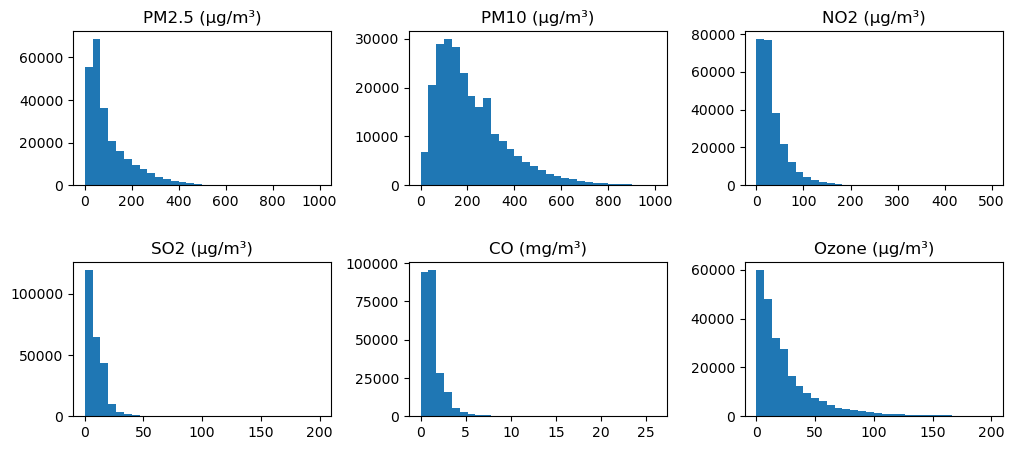

In [31]:
# Select all numeric columns (excluding datetime)
numeric_cols = data.select_dtypes(include=['number'])


axes = numeric_cols.hist(figsize=(12, 8), bins=30, layout = (3,3))


for ax in axes.flatten():
    ax.grid(False)

plt.subplots_adjust(hspace=0.5)
plt.show()

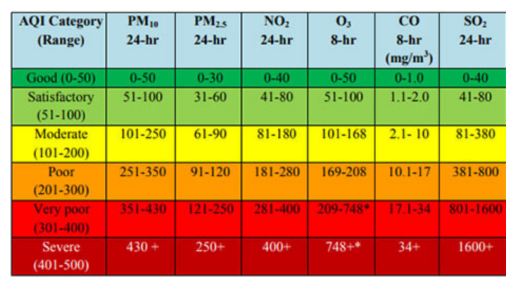

In [33]:
# CPCB Breakpoint for each pollutants

img = mpimg.imread("breakpoint_cpcb.png") 
plt.imshow(img)
plt.axis("off") 
plt.show();

In [34]:
# Function to calculate AQI sub-index for a given pollutant concentration

def calculate_sub_index(c, breakpoints):
    if np.isnan(c):  # Handle NaN values
        return np.nan
    for bp in breakpoints:
        if bp[0] <= c <= bp[1]:
            return ((bp[3] - bp[2]) / (bp[1] - bp[0])) * (c - bp[0]) + bp[2]
    return 500  # Cap AQI at 500 for extreme values

# Define breakpoints for each pollutant
breakpoints = {
    "PM2.5 (µg/m³)": [(0,30,0,50), (31,60,51,100), (61,90,101,200), (91,120,201,300), (121,250,301,400), (251,500,401,500)],
    "PM10 (µg/m³)": [(0,50,0,50), (51,100,51,100), (101,250,101,200), (251,350,201,300), (351,430,301,400), (431,600,401,500)],
    "NO2 (µg/m³)": [(0,40,0,50), (41,80,51,100), (81,180,101,200), (181,280,201,300), (281,400,301,400), (401,1000,401,500)],
    "SO2 (µg/m³)": [(0,40,0,50), (41,80,51,100), (81,380,101,200), (381,800,201,300), (801,1600,301,400), (1601,2000,401,500)],
    "CO (mg/m³)": [(0,1,0,50), (1.1,2,51,100), (2.1,10,101,200), (10.1,17,201,300), (17.1,34,301,400), (34.1,50,401,500)],
    "Ozone (µg/m³)": [(0,50,0,50), (51,100,51,100), (101,168,101,200), (169,208,201,300), (209,748,301,400), (749,1000,401,500)]
}

# Compute sub-index for each pollutant
for pollutant, bp in breakpoints.items():
    data[f"AQI_{pollutant}"] = data[pollutant].apply(lambda x: calculate_sub_index(x, bp))

# Compute overall AQI (max of all sub-indices)
data["AQI"] = data[[f"AQI_{p}" for p in breakpoints.keys()]].max(axis=1)


In [35]:
data.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Location,AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
0,2023-01-01 00:00:00,134.0,174.0,29.925,5.650000,0.875,4.475,alipur,310.976744,149.503356,37.40625,7.062500,43.75,4.475,310.976744
1,2023-01-01 01:00:00,112.0,138.0,26.425,5.625000,0.800,3.800,alipur,272.689655,125.583893,33.03125,7.031250,40.00,3.800,272.689655
2,2023-01-01 02:00:00,103.0,134.0,31.700,6.200000,0.800,3.100,alipur,241.965517,122.926174,39.62500,7.750000,40.00,3.100,241.965517
3,2023-01-01 03:00:00,114.0,139.0,29.100,5.450000,0.925,2.600,alipur,279.517241,126.248322,36.37500,6.812500,46.25,2.600,279.517241
4,2023-01-01 04:00:00,136.0,169.0,25.900,5.666667,1.000,2.775,alipur,312.511628,146.181208,32.37500,7.083333,50.00,2.775,312.511628


In [12]:
# Save This DataFrame In Form Of CSV file.
data.to_csv('all data/complete_data_with_aqi.csv', index=False)

In [36]:
data['AQI'].max()

500.0

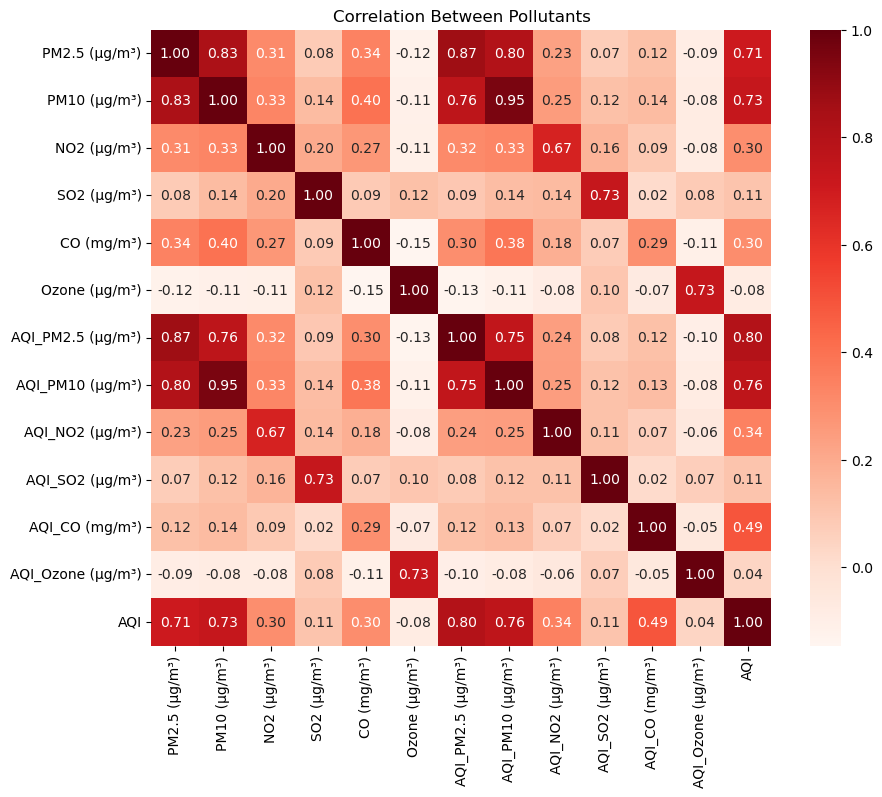

In [37]:
# Correlation metrics

# Select all numeric columns (excluding datetime)
numeric_cols = data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Between Pollutants")
plt.show()

# Daily Data Analysis

In [38]:
data_days = pd.read_csv('all data/complete_data_with_aqi.csv')
data_days.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Location,AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
0,2023-01-01 00:00:00,134.0,174.0,29.925,5.650000,0.875,4.475,alipur,310.976744,149.503356,37.40625,7.062500,43.75,4.475,310.976744
1,2023-01-01 01:00:00,112.0,138.0,26.425,5.625000,0.800,3.800,alipur,272.689655,125.583893,33.03125,7.031250,40.00,3.800,272.689655
2,2023-01-01 02:00:00,103.0,134.0,31.700,6.200000,0.800,3.100,alipur,241.965517,122.926174,39.62500,7.750000,40.00,3.100,241.965517
3,2023-01-01 03:00:00,114.0,139.0,29.100,5.450000,0.925,2.600,alipur,279.517241,126.248322,36.37500,6.812500,46.25,2.600,279.517241
4,2023-01-01 04:00:00,136.0,169.0,25.900,5.666667,1.000,2.775,alipur,312.511628,146.181208,32.37500,7.083333,50.00,2.775,312.511628


In [39]:
data_days['Timestamp'] = pd.to_datetime(data_days['Timestamp'])
data_days['Date'] = data_days['Timestamp'].dt.date
data_days.drop(columns = ['Timestamp','Location'], inplace = True)
data_days = data_days.groupby('Date').mean()
data_days = data_days.reset_index()
data_days = data_days.round(2)

In [40]:
print(len(data_days))
data_days.head()

365


,Date,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
0,2023-01-01,145.70,230.39,37.23,8.00,1.48,19.61,282.04,196.19,56.43,10.00,74.49,20.44,297.51
1,2023-01-02,235.95,347.79,37.62,7.31,1.25,16.48,380.31,302.20,53.65,9.14,88.45,18.48,395.52
2,2023-01-03,246.16,381.94,33.85,11.04,1.09,16.65,390.02,336.83,48.75,13.79,74.16,19.32,403.97
3,2023-01-04,184.56,294.01,33.89,9.56,1.19,16.81,340.56,251.79,44.49,13.13,67.23,18.15,351.50
4,2023-01-05,214.52,338.51,42.98,10.76,1.44,12.23,356.14,287.98,58.36,13.78,84.83,12.90,370.53


In [41]:
# Find most polluted day of year 2023
most_polluted_day = data_days.loc[data_days['AQI'].idxmax()]
print(f'Date     : {most_polluted_day['Date']}')
print(f'Avg AQI  : {most_polluted_day['AQI']}')

Date     : 2023-01-09
Avg AQI  : 456.72


In [42]:
# Find most clean day of year 2023
most_clean_day = data_days.loc[data_days['AQI'].idxmin()]
print(f'Date    : {most_clean_day['Date']}')
print(f'Avg AQI : {most_clean_day['AQI']}')

Date    : 2023-09-09
Avg AQI : 70.68


In [50]:
# Find Days With Good AQI
good_aqi_days = data_days[(data_days['AQI']>=0) & (data_days['AQI']<=50)]
print(f"Total Days With Good AQI         : {len(good_aqi_days)}")

# Find Days With Satisfactory AQI
satis_aqi_days = data_days[(data_days['AQI']>=51) & (data_days['AQI']<=100)]
print(f"Total Days With Satisfactory AQI : {len(satis_aqi_days)}")

# Find Days With Moderate AQI
mod_aqi_days = data_days[(data_days['AQI']>=101) & (data_days['AQI']<=200)]
print(f"Total Days With Moderate AQI     : {len(mod_aqi_days)}")

# Find Days With Poor AQI
poor_aqi_days = data_days[(data_days['AQI']>=201) & (data_days['AQI']<=300)]
print(f"Total Days With Poor AQI         : {len(poor_aqi_days)}")

# Find Days With Very Poor AQI
vpoor_aqi_days = data_days[(data_days['AQI']>=301) & (data_days['AQI']<=400)]
print(f"Total Days With Very Poor AQI    : {len(vpoor_aqi_days)}")

# Find Days With Severe AQI
severe_aqi_days = data_days[(data_days['AQI']>=401)]
print(f"Total Days With Severe AQI       : {len(severe_aqi_days)}")

# print()

# if not good_aqi_days.empty:
#     for i in good_aqi_days['Date']:
#         print(i)
# else:
#     print("No Data Found With Good AQI Level!!!")

Total Days With Good AQI         : 0
Total Days With Satisfactory AQI : 3
Total Days With Moderate AQI     : 156
Total Days With Poor AQI         : 103
Total Days With Very Poor AQI    : 75
Total Days With Severe AQI       : 26


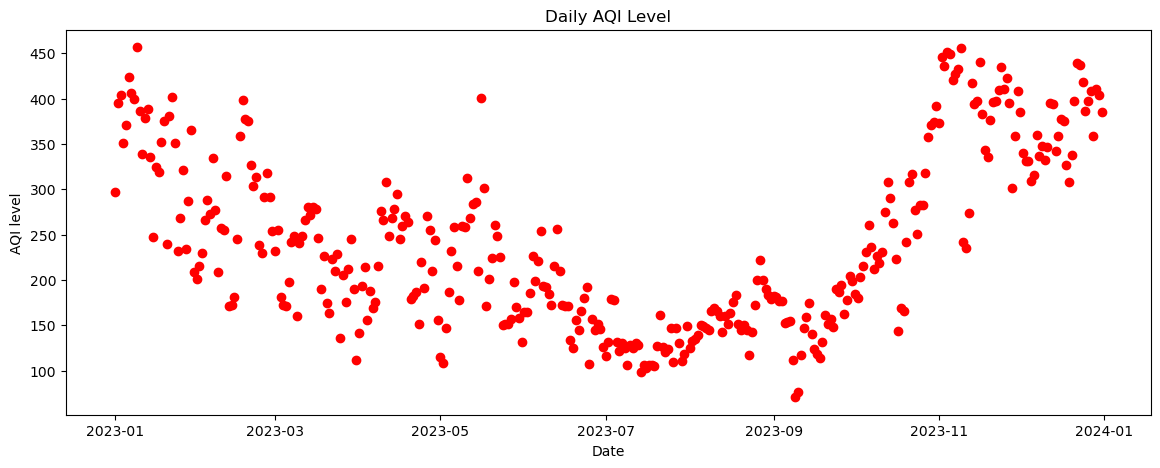

In [51]:
plt.figure(figsize=(14,5))
plt.scatter(data_days['Date'], data_days['AQI'], color = 'red')
plt.xlabel('Date')
plt.ylabel('AQI level')
plt.title('Daily AQI Level');

<span style='font-size:16px;'>From the graph, AQI levels are lowest between July and September, indicating better air quality during these months, likely due to the monsoon season. </span>    
<span style='font-size:16px;'>The highest AQI levels occur in January and November-December, suggesting severe pollution during winter months.</span>

# Month Wise Analysis

In [52]:
data_month = pd.read_csv('all data/complete_data_with_aqi.csv')

In [53]:
data_month.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Location,AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
0,2023-01-01 00:00:00,134.0,174.0,29.925,5.650000,0.875,4.475,alipur,310.976744,149.503356,37.40625,7.062500,43.75,4.475,310.976744
1,2023-01-01 01:00:00,112.0,138.0,26.425,5.625000,0.800,3.800,alipur,272.689655,125.583893,33.03125,7.031250,40.00,3.800,272.689655
2,2023-01-01 02:00:00,103.0,134.0,31.700,6.200000,0.800,3.100,alipur,241.965517,122.926174,39.62500,7.750000,40.00,3.100,241.965517
3,2023-01-01 03:00:00,114.0,139.0,29.100,5.450000,0.925,2.600,alipur,279.517241,126.248322,36.37500,6.812500,46.25,2.600,279.517241
4,2023-01-01 04:00:00,136.0,169.0,25.900,5.666667,1.000,2.775,alipur,312.511628,146.181208,32.37500,7.083333,50.00,2.775,312.511628


In [54]:
data_month['Timestamp']=pd.to_datetime(data_month['Timestamp'])
data_month['Month'] = data_month['Timestamp'].dt.month

In [55]:
data_month.drop(columns=['Location','Timestamp'], inplace=True, axis=0)

In [56]:
data_month.head()

,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI,Month
0,134.0,174.0,29.925,5.650000,0.875,4.475,310.976744,149.503356,37.40625,7.062500,43.75,4.475,310.976744,1
1,112.0,138.0,26.425,5.625000,0.800,3.800,272.689655,125.583893,33.03125,7.031250,40.00,3.800,272.689655,1
2,103.0,134.0,31.700,6.200000,0.800,3.100,241.965517,122.926174,39.62500,7.750000,40.00,3.100,241.965517,1
3,114.0,139.0,29.100,5.450000,0.925,2.600,279.517241,126.248322,36.37500,6.812500,46.25,2.600,279.517241,1
4,136.0,169.0,25.900,5.666667,1.000,2.775,312.511628,146.181208,32.37500,7.083333,50.00,2.775,312.511628,1


In [57]:
data_month=data_month.groupby("Month").mean()

In [58]:
data_month

,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
Month,,,,,,,,,,,,,
1,182.399607,299.220501,42.414531,9.432701,1.310499,17.890283,314.303143,253.702897,57.623466,11.910537,81.712010,19.465646,336.941277
2,116.914429,248.465679,46.777527,9.225011,1.311845,25.793413,233.411863,213.128438,63.425495,11.654390,79.440227,29.219922,277.395539
3,78.769384,178.984326,34.647738,10.574224,1.152519,27.612187,163.962445,158.605790,48.953868,13.465445,72.370156,30.719884,215.021653
4,69.273995,208.145180,37.830231,12.347330,1.241735,33.927762,141.424484,182.836899,51.060237,16.186056,70.751610,38.986823,222.649412
5,66.571757,193.735274,37.501994,12.279541,1.278371,36.679595,133.602646,169.523828,50.313648,15.003406,75.089926,41.732330,213.568294
6,45.630514,145.653056,28.201198,8.791904,1.140904,28.544163,91.649910,132.556462,39.250246,10.993539,77.094286,31.518902,176.111161
7,35.208135,84.897061,21.940937,7.218178,1.244702,23.208695,67.429345,84.059882,29.517953,8.968200,77.080422,24.821235,126.669136
8,38.216651,136.425817,19.561359,7.249419,1.061686,20.000819,74.569388,125.909899,26.957880,9.058922,70.764100,21.418311,160.011790
9,43.808286,117.959533,22.990115,7.373356,1.122885,25.480453,82.615787,108.915242,32.382093,9.234570,76.060300,27.998999,153.152938


In [59]:
data_month = data_month.round(2)
data_month.head()

,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
Month,,,,,,,,,,,,,
1,182.40,299.22,42.41,9.43,1.31,17.89,314.30,253.70,57.62,11.91,81.71,19.47,336.94
2,116.91,248.47,46.78,9.23,1.31,25.79,233.41,213.13,63.43,11.65,79.44,29.22,277.40
3,78.77,178.98,34.65,10.57,1.15,27.61,163.96,158.61,48.95,13.47,72.37,30.72,215.02
4,69.27,208.15,37.83,12.35,1.24,33.93,141.42,182.84,51.06,16.19,70.75,38.99,222.65
5,66.57,193.74,37.50,12.28,1.28,36.68,133.60,169.52,50.31,15.00,75.09,41.73,213.57


In [60]:
data_month = data_month.reset_index()
data_month

,Month,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
0,1,182.40,299.22,42.41,9.43,1.31,17.89,314.30,253.70,57.62,11.91,81.71,19.47,336.94
1,2,116.91,248.47,46.78,9.23,1.31,25.79,233.41,213.13,63.43,11.65,79.44,29.22,277.40
2,3,78.77,178.98,34.65,10.57,1.15,27.61,163.96,158.61,48.95,13.47,72.37,30.72,215.02
3,4,69.27,208.15,37.83,12.35,1.24,33.93,141.42,182.84,51.06,16.19,70.75,38.99,222.65
4,5,66.57,193.74,37.50,12.28,1.28,36.68,133.60,169.52,50.31,15.00,75.09,41.73,213.57
5,6,45.63,145.65,28.20,8.79,1.14,28.54,91.65,132.56,39.25,10.99,77.09,31.52,176.11
6,7,35.21,84.90,21.94,7.22,1.24,23.21,67.43,84.06,29.52,8.97,77.08,24.82,126.67
7,8,38.22,136.43,19.56,7.25,1.06,20.00,74.57,125.91,26.96,9.06,70.76,21.42,160.01
8,9,43.81,117.96,22.99,7.37,1.12,25.48,82.62,108.92,32.38,9.23,76.06,28.00,153.15
9,10,102.09,241.87,37.80,8.61,1.43,26.70,203.01,207.09,51.33,10.90,82.14,30.04,258.35


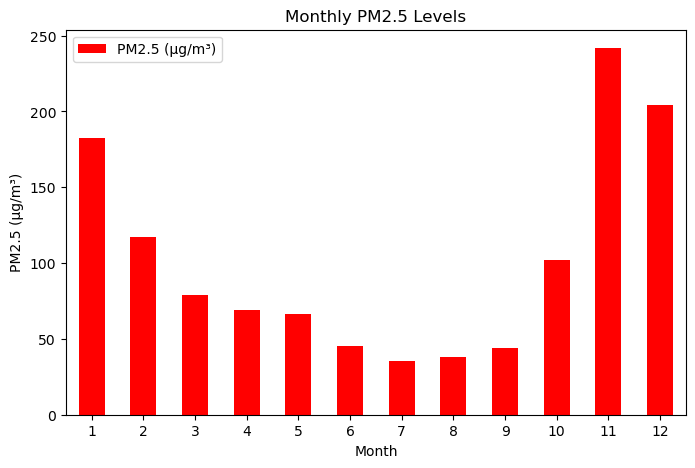

In [61]:
data_month.plot(kind = 'bar', x = 'Month', y = 'PM2.5 (µg/m³)', figsize=(8,5), color='red')
plt.xlabel("Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=0)
plt.title("Monthly PM2.5 Levels")
plt.show()


<span style='font-size:16px'>The PM2.5 levels show significant seasonal variation. The pollution levels are highest during winter, peaking in November, and lowest in July. </span>

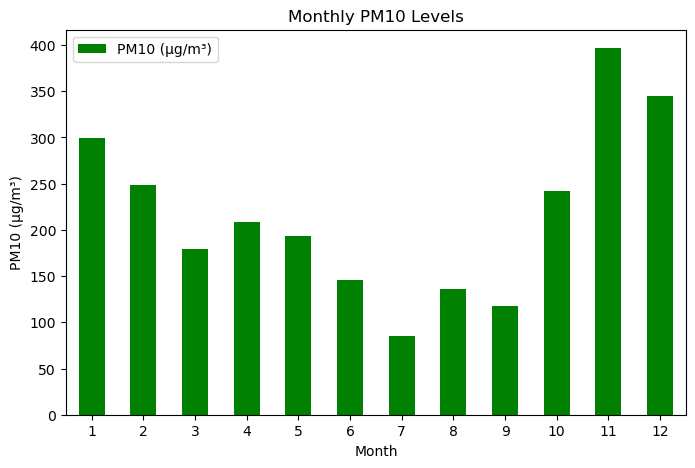

In [48]:
data_month.plot(kind = 'bar', x = 'Month', y = 'PM10 (µg/m³)', figsize=(8,5), color='green')
plt.xlabel("Month")
plt.ylabel("PM10 (µg/m³)")
plt.xticks(rotation=0)
plt.title("Monthly PM10 Levels")
plt.show()

<span style='font-size:16px;'>The PM10 levels show significant seasonal variation. The pollution levels are highest during winter, peaking in November, and lowest in July.</span>


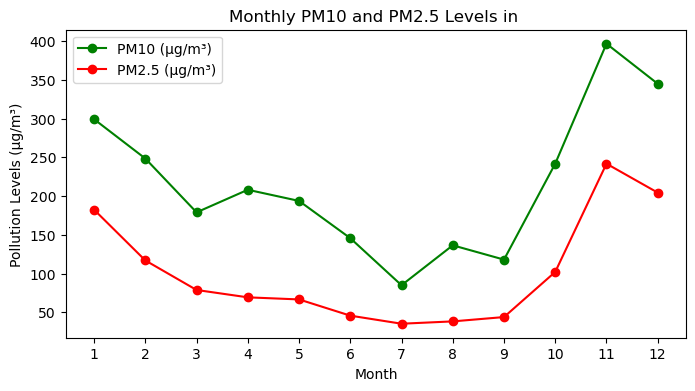

In [49]:
data_month.plot(kind='line', x='Month', y=['PM10 (µg/m³)', 'PM2.5 (µg/m³)'], 
                figsize=(8, 4), color=['green', 'red'], marker='o')

plt.xlabel("Month")
plt.ylabel("Pollution Levels (µg/m³)")
plt.title("Monthly PM10 and PM2.5 Levels in ")
plt.xticks(rotation=0)  
plt.xticks(data_month['Month'])
plt.legend(["PM10 (µg/m³)", "PM2.5 (µg/m³)"])
plt.show()

<span style='font-size:16px'>PM2.5 & PM10 are strongly related to each other. Correlation between this pollutants is `0.83`

<span style='font-size:16px'>The plot shows that PM10 levels are consistently higher than PM2.5 levels across all months, indicating the presence of both coarse and fine particulate pollution. Pollution peaks in winter months (especially January and November), likely due to inversions, crop burning, and low wind speeds. The lowest levels occur during the monsoon (July), as rainfall helps wash away pollutants.

<span style='font-size:16px'>PM10 (Particulate Matter ≤ 10 µm) → Coarse particles like dust, pollen, and ash.   
<span style='font-size:16px'>PM2.5 (Particulate Matter ≤ 2.5 µm) → Fine particles from combustion, vehicle emissions, and industrial pollution.</span>

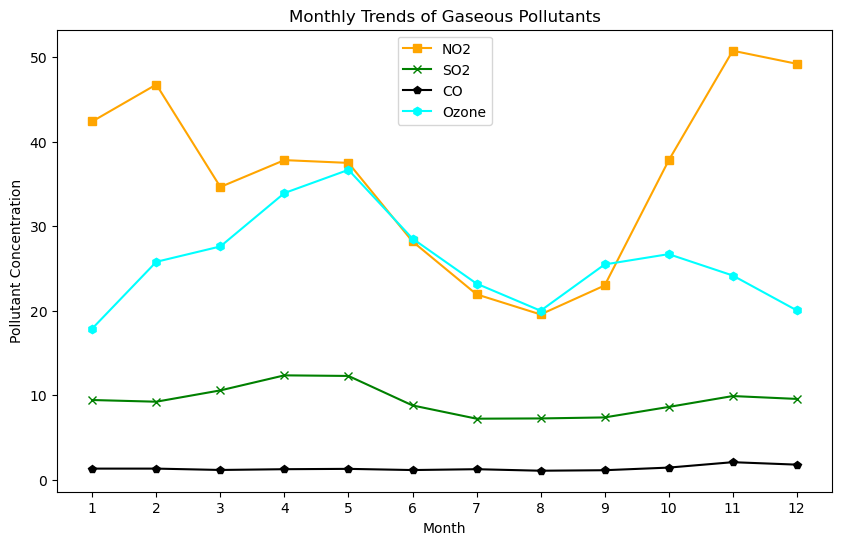

In [62]:
plt.figure(figsize=(10, 6))

plt.plot(data_month["Month"], data_month["NO2 (µg/m³)"], marker='s', linestyle='-', label="NO2", color="orange")
plt.plot(data_month["Month"], data_month["SO2 (µg/m³)"], marker='x', linestyle='-', label="SO2", color="green")
plt.plot(data_month["Month"], data_month["CO (mg/m³)"], marker='p', linestyle='-', label="CO", color="black")
plt.plot(data_month["Month"], data_month["Ozone (µg/m³)"], marker='h', linestyle='-', label="Ozone", color="cyan")

plt.xlabel("Month")
plt.ylabel("Pollutant Concentration")
plt.title("Monthly Trends of Gaseous Pollutants")
plt.xticks(range(1, 13))
plt.legend()
# plt.grid()
plt.show()


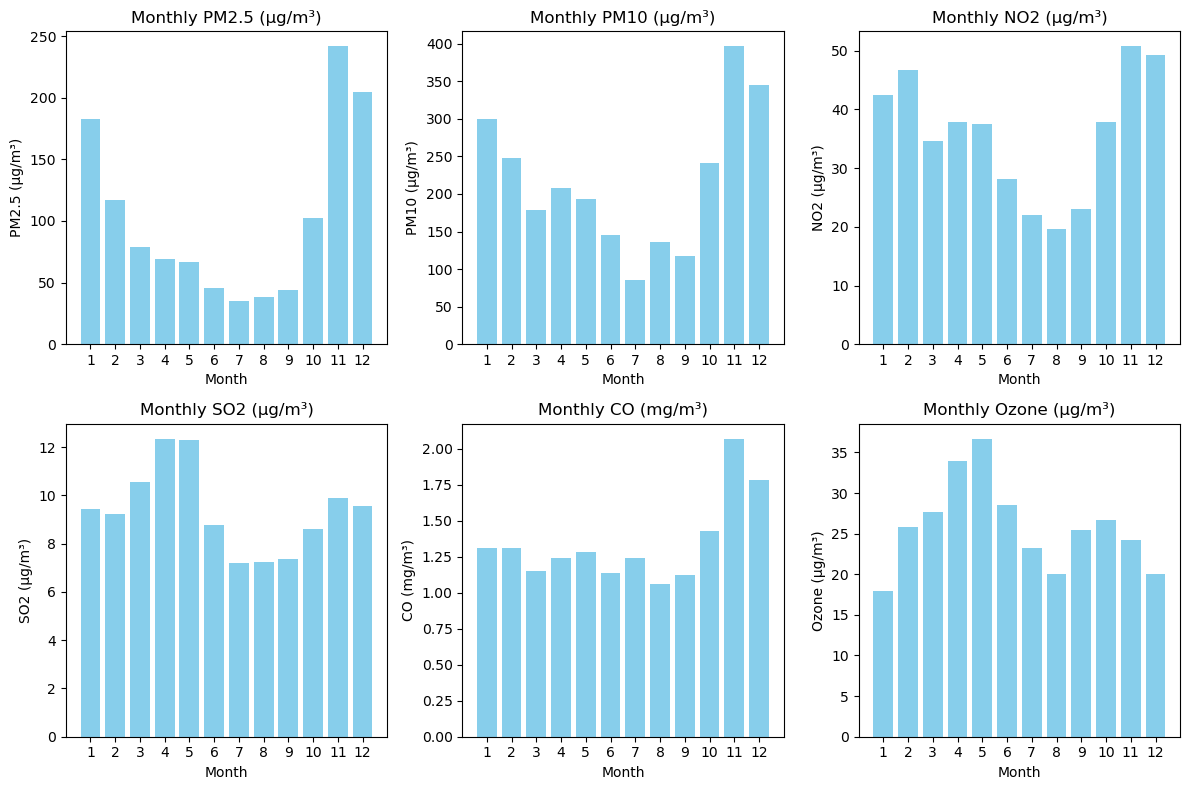

In [63]:
fig, axes = plt.subplots(2,3, figsize=(12, 8))

pollutants = ["PM2.5 (µg/m³)", "PM10 (µg/m³)","NO2 (µg/m³)","SO2 (µg/m³)", "CO (mg/m³)",'Ozone (µg/m³)']

for i, col in enumerate(pollutants):
    row, col_idx = divmod(i, 3)
    axes[row, col_idx].bar(data_month["Month"], data_month[col], color="skyblue")
    axes[row, col_idx].set_title(f"Monthly {col}")
    axes[row, col_idx].set_xlabel("Month")
    axes[row, col_idx].set_ylabel(col)
    axes[row, col_idx].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

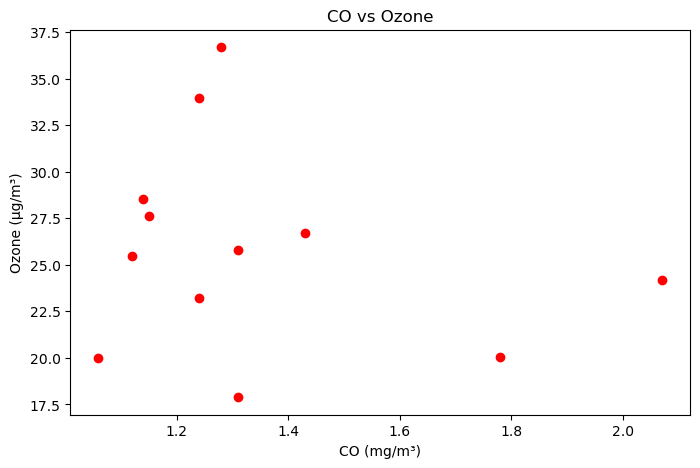

In [64]:
plt.figure(figsize=(8, 5))
plt.scatter(x=data_month["CO (mg/m³)"], y=data_month["Ozone (µg/m³)"], color="red")
plt.xlabel("CO (mg/m³)")
plt.ylabel("Ozone (µg/m³)")
plt.title("CO vs Ozone")
plt.show()

<span style='font-size:16px'>Ozone and CO have a negative correlation.  
<span style='font-size:16px'>Higher CO leads to lower Ozone.

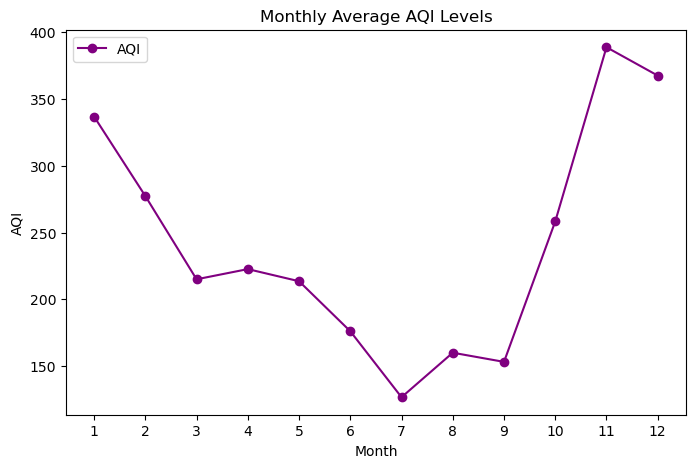

In [65]:
data_month.plot(kind = 'line', x = 'Month', y = 'AQI', figsize=(8,5), color='purple', marker='o')
plt.xlabel("Month")
plt.ylabel("AQI")
plt.xticks(rotation=0)
plt.xticks(data_month['Month'])
plt.title("Monthly Average AQI Levels")
plt.show()

<span style='font-size:16px'>* The AQI levels peak in November, indicating severe air pollution during winter, likely due to stubble burning, low temperatures, and increased emissions.   
<span style='font-size:16px'>* In contrast, July records the lowest AQI, suggesting improved air quality during the monsoon season, as rainfall helps wash away pollutants from the air.

In [66]:
# Find the month with good Air Quality
good_air_quality = data_month[(data_month['AQI'] >= 0) & (data_month['AQI'] <= 50)]
ls =  list(good_air_quality['Month'])
if ls:
    print(ls)
else:
    print('No data find !!!')

No data find !!!


In [67]:
# Find the month with satisfactory Air Quality
good_air_quality = data_month[(data_month['AQI'] >= 51) & (data_month['AQI'] <= 100)]
ls =  list(good_air_quality['Month'])
if ls:
    print('Month with satisfactory AQI')
    print(ls)
else:
    print('No data find !!!')

No data find !!!


In [68]:
# Find the month with moderate Air Quality
good_air_quality = data_month[(data_month['AQI'] >= 101) & (data_month['AQI'] <= 200)]
ls =  list(good_air_quality['Month'])
if ls:
    print('Month with moderate AQI')
    print(ls)
else:
    print('No data find !!!')

Month with moderate AQI
[6, 7, 8, 9]


In [69]:
# Find the month with poor Air Quality
good_air_quality = data_month[(data_month['AQI'] >= 201) & (data_month['AQI'] <= 300)]
ls =  list(good_air_quality['Month'])
if ls:
    print('Month with poor AQI')
    print(ls)
else:
    print('No data find !!!')

Month with poor AQI
[2, 3, 4, 5, 10]


In [70]:
# Find the month with Very poor Air Quality
good_air_quality = data_month[(data_month['AQI'] >= 301) & (data_month['AQI'] <= 400)]
ls =  list(good_air_quality['Month'])
if ls:
    print('Month with very poor AQI')
    print(ls)
else:
    print('No data find !!!')

Month with very poor AQI
[1, 11, 12]


# Hourly Analysis

In [71]:
data_hour = pd.read_csv('all data/complete_data_with_aqi.csv')
data_hour.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Location,AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
0,2023-01-01 00:00:00,134.0,174.0,29.925,5.650000,0.875,4.475,alipur,310.976744,149.503356,37.40625,7.062500,43.75,4.475,310.976744
1,2023-01-01 01:00:00,112.0,138.0,26.425,5.625000,0.800,3.800,alipur,272.689655,125.583893,33.03125,7.031250,40.00,3.800,272.689655
2,2023-01-01 02:00:00,103.0,134.0,31.700,6.200000,0.800,3.100,alipur,241.965517,122.926174,39.62500,7.750000,40.00,3.100,241.965517
3,2023-01-01 03:00:00,114.0,139.0,29.100,5.450000,0.925,2.600,alipur,279.517241,126.248322,36.37500,6.812500,46.25,2.600,279.517241
4,2023-01-01 04:00:00,136.0,169.0,25.900,5.666667,1.000,2.775,alipur,312.511628,146.181208,32.37500,7.083333,50.00,2.775,312.511628


In [72]:
data_hour['Timestamp'] = pd.to_datetime(data_hour['Timestamp'])
data_hour['Hour'] = data_hour['Timestamp'].dt.hour
data_hour.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Location,AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI,Hour
0,2023-01-01 00:00:00,134.0,174.0,29.925,5.650000,0.875,4.475,alipur,310.976744,149.503356,37.40625,7.062500,43.75,4.475,310.976744,0
1,2023-01-01 01:00:00,112.0,138.0,26.425,5.625000,0.800,3.800,alipur,272.689655,125.583893,33.03125,7.031250,40.00,3.800,272.689655,1
2,2023-01-01 02:00:00,103.0,134.0,31.700,6.200000,0.800,3.100,alipur,241.965517,122.926174,39.62500,7.750000,40.00,3.100,241.965517,2
3,2023-01-01 03:00:00,114.0,139.0,29.100,5.450000,0.925,2.600,alipur,279.517241,126.248322,36.37500,6.812500,46.25,2.600,279.517241,3
4,2023-01-01 04:00:00,136.0,169.0,25.900,5.666667,1.000,2.775,alipur,312.511628,146.181208,32.37500,7.083333,50.00,2.775,312.511628,4


In [73]:
data_hour.drop(columns=['Location','Timestamp'], inplace=True, axis=0)
data_hour.head()

,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI,Hour
0,134.0,174.0,29.925,5.650000,0.875,4.475,310.976744,149.503356,37.40625,7.062500,43.75,4.475,310.976744,0
1,112.0,138.0,26.425,5.625000,0.800,3.800,272.689655,125.583893,33.03125,7.031250,40.00,3.800,272.689655,1
2,103.0,134.0,31.700,6.200000,0.800,3.100,241.965517,122.926174,39.62500,7.750000,40.00,3.100,241.965517,2
3,114.0,139.0,29.100,5.450000,0.925,2.600,279.517241,126.248322,36.37500,6.812500,46.25,2.600,279.517241,3
4,136.0,169.0,25.900,5.666667,1.000,2.775,312.511628,146.181208,32.37500,7.083333,50.00,2.775,312.511628,4


In [74]:
data_hour = data_hour.groupby('Hour').mean()
data_hour.head()

,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
Hour,,,,,,,,,,,,,
0,121.446798,252.637370,40.680284,9.593025,1.625699,14.889148,211.248603,216.431881,55.457005,12.206199,88.755783,15.761351,265.791124
1,119.127510,239.185577,37.887405,9.265331,1.503707,16.792834,208.239161,206.231306,51.563674,11.733824,85.241405,17.766190,258.473401
2,115.329336,225.463794,35.856374,8.918830,1.385072,15.725017,204.099132,196.736819,48.854418,11.552789,71.625727,16.944929,246.088527
3,113.155549,215.981979,34.334881,8.813693,1.334381,15.450265,202.569220,189.401364,47.091328,11.064385,77.816602,16.603284,245.796598
4,111.748746,210.502781,33.281786,8.658253,1.289543,15.214234,202.436130,184.260130,46.505747,10.885400,78.572842,16.059825,246.266074


In [75]:
data_hour = data_hour.round(2)
data_hour = data_hour.reset_index()
data_hour.head()

,Hour,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
0,0,121.45,252.64,40.68,9.59,1.63,14.89,211.25,216.43,55.46,12.21,88.76,15.76,265.79
1,1,119.13,239.19,37.89,9.27,1.50,16.79,208.24,206.23,51.56,11.73,85.24,17.77,258.47
2,2,115.33,225.46,35.86,8.92,1.39,15.73,204.10,196.74,48.85,11.55,71.63,16.94,246.09
3,3,113.16,215.98,34.33,8.81,1.33,15.45,202.57,189.40,47.09,11.06,77.82,16.60,245.80
4,4,111.75,210.50,33.28,8.66,1.29,15.21,202.44,184.26,46.51,10.89,78.57,16.06,246.27


In [76]:
len(data_hour)

24

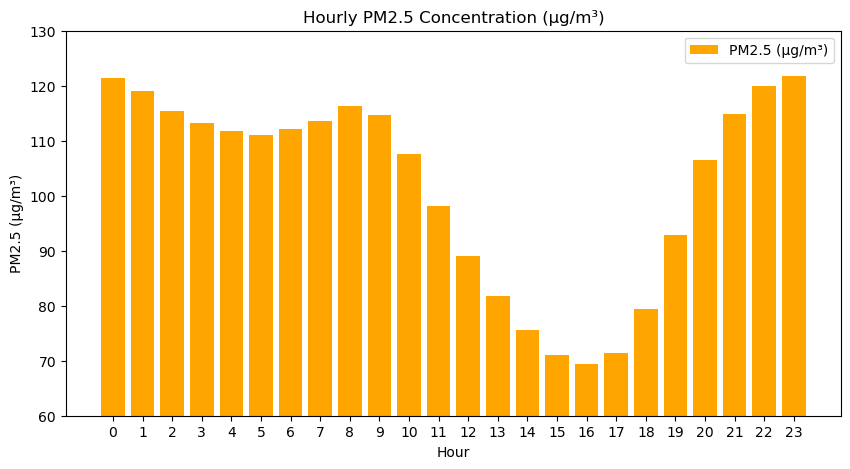

In [77]:
plt.figure(figsize=(10,5))
plt.bar(data_hour["Hour"], data_hour['PM2.5 (µg/m³)'], color='orange', label = 'PM2.5 (µg/m³)')
plt.title("Hourly PM2.5 Concentration (µg/m³)")
plt.xlabel('Hour')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.ylim((60,130))
plt.xticks(data_hour['Hour']);

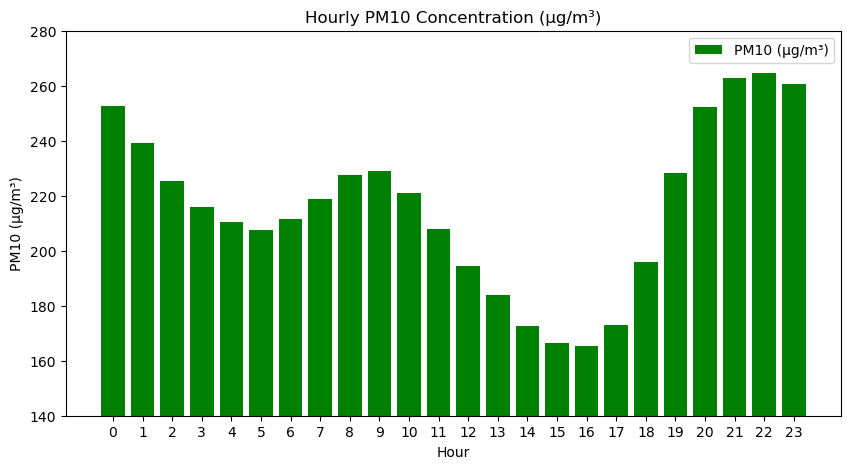

In [78]:
plt.figure(figsize=(10,5))
plt.bar(data_hour["Hour"], data_hour['PM10 (µg/m³)'], color='green', label = 'PM10 (µg/m³)')
plt.title("Hourly PM10 Concentration (µg/m³)")
plt.xlabel('Hour')
plt.ylabel('PM10 (µg/m³)')
plt.legend()
plt.ylim((140,280))
plt.xticks(data_hour['Hour']);

<span style='font-size:16px'>* PM10 levels are high in the morning and evening, likely due to dust from construction sites, industrial activities and vehicle pollution.  
<span style='font-size:16px'>* During midday, the levels drop as the air spreads out and human activity is lower.

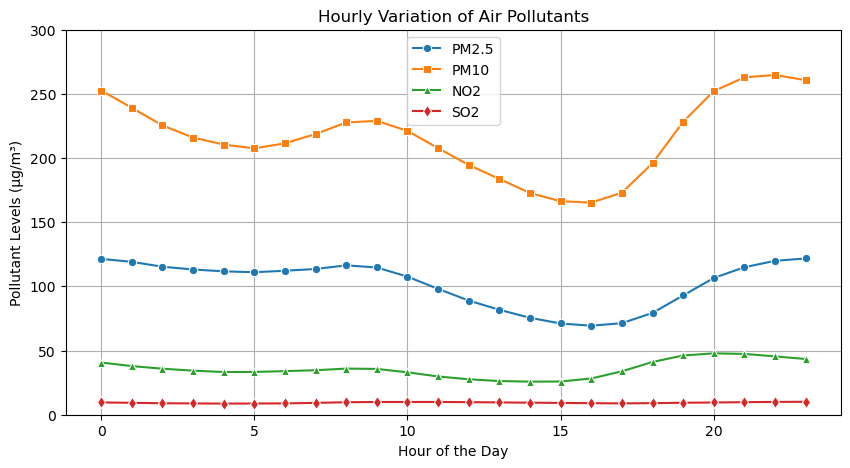

In [79]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=data_hour["Hour"], y=data_hour["PM2.5 (µg/m³)"], label="PM2.5", marker="o")
sns.lineplot(x=data_hour["Hour"], y=data_hour["PM10 (µg/m³)"], label="PM10", marker="s")
sns.lineplot(x=data_hour["Hour"], y=data_hour["NO2 (µg/m³)"], label="NO2", marker="^")
sns.lineplot(x=data_hour["Hour"], y=data_hour["SO2 (µg/m³)"], label="SO2", marker="d")

plt.xlabel("Hour of the Day")
plt.ylabel("Pollutant Levels (µg/m³)")
plt.title("Hourly Variation of Air Pollutants")
plt.ylim((0,300))
plt.legend(loc = 'upper center')
plt.grid(True)
plt.show()

<Figure size 800x500 with 0 Axes>

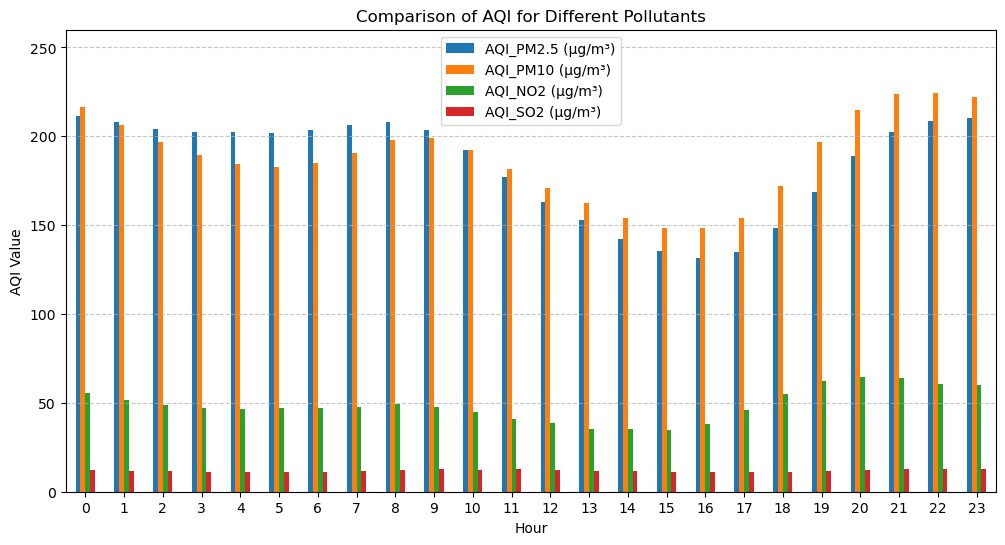

In [80]:
plt.figure(figsize=(8,5))
data_hour.set_index("Hour")[["AQI_PM2.5 (µg/m³)", "AQI_PM10 (µg/m³)", "AQI_NO2 (µg/m³)", "AQI_SO2 (µg/m³)"]].plot(kind="bar", figsize=(12, 6))
plt.ylabel("AQI Value")
plt.title("Comparison of AQI for Different Pollutants")
plt.xticks(rotation=0)
plt.legend()
plt.ylim((0,260))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show();

<span style='font-size:16px'>* The graph indicates that from 1 AM to 9 AM, PM2.5 levels are higher than PM10, suggesting fine particulate pollution dominance in the early hours.   
<span style='font-size:16px'>*  However, PM10 levels become higher than PM2.5 levels after 11 AM, likely due to increased dust and coarse particles in the air. This shift may be influenced by atmospheric conditions and human activities like traffic and construction.

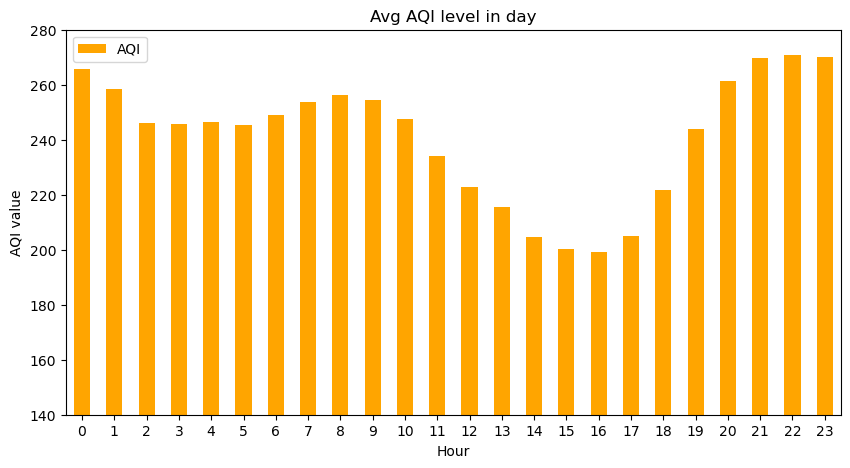

In [81]:
# Find Most Polluted Hours In a Day
data_hour.plot(kind='bar', x = 'Hour', y='AQI', color = 'orange', figsize = (10,5))
plt.xlabel('Hour')
plt.ylabel('AQI value')
plt.ylim((140,280))
plt.xticks(data_hour['Hour'], rotation=0)
plt.title('Avg AQI level in day');

<span style='font-size:16px'>* The graph shows that AQI is highest around midnight (0-1 AM) and late evening (8-11 PM), indicating peak pollution during these hours. The lowest AQI levels occur in the afternoon (2-4 PM). Pollution levels drop in the afternoon but rise again in the evening due to increased human activities. 

# Station Wise Analysis

In [82]:
data_station = data_hour = pd.read_csv('all data/complete_data_with_aqi.csv')
data.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Location,AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
0,2023-01-01 00:00:00,134.0,174.0,29.925,5.650000,0.875,4.475,alipur,310.976744,149.503356,37.40625,7.062500,43.75,4.475,310.976744
1,2023-01-01 01:00:00,112.0,138.0,26.425,5.625000,0.800,3.800,alipur,272.689655,125.583893,33.03125,7.031250,40.00,3.800,272.689655
2,2023-01-01 02:00:00,103.0,134.0,31.700,6.200000,0.800,3.100,alipur,241.965517,122.926174,39.62500,7.750000,40.00,3.100,241.965517
3,2023-01-01 03:00:00,114.0,139.0,29.100,5.450000,0.925,2.600,alipur,279.517241,126.248322,36.37500,6.812500,46.25,2.600,279.517241
4,2023-01-01 04:00:00,136.0,169.0,25.900,5.666667,1.000,2.775,alipur,312.511628,146.181208,32.37500,7.083333,50.00,2.775,312.511628


In [83]:
data_station.drop(columns = 'Timestamp', inplace = True)
data_station = data_station.groupby('Location').mean()
data_station = data_station.reset_index()


In [84]:
print(len(data_station))
data_station = data_station.round(2)
data_station.head()

28


,Location,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AQI_PM2.5 (µg/m³),AQI_PM10 (µg/m³),AQI_NO2 (µg/m³),AQI_SO2 (µg/m³),AQI_CO (mg/m³),AQI_Ozone (µg/m³),AQI
0,alipur,97.93,180.58,26.57,9.63,1.29,38.89,179.50,159.06,37.68,12.44,79.68,44.15,227.90
1,anandVihar,125.03,291.77,74.92,14.39,2.11,18.66,212.94,244.62,94.97,18.74,99.42,20.56,286.39
2,ashokVihar,90.63,207.68,24.21,6.19,1.10,8.83,165.13,181.11,34.62,7.79,68.50,9.09,224.98
3,ayaNagar,85.62,162.78,12.99,8.50,1.25,37.73,164.83,149.50,17.06,10.62,77.92,42.08,214.23
4,bawana,119.83,236.01,11.88,3.04,1.10,22.94,204.22,203.18,15.92,3.90,82.02,26.07,255.12


In [85]:
# Find the Most Polluted Station of 2023
mp_station = data_station.loc[data_station['AQI'].idxmax()]
print(f"Station Name : {mp_station['Location'].title()}")
print(f"Avg AQI      : {mp_station['AQI']}")

Station Name : Anandvihar
Avg AQI      : 286.39


In [86]:
# Find the cleanest station of 2023
mc_station = data_station.loc[data_station['AQI'].idxmin()]
print(f"Station Name : {mc_station['Location'].title()}")
print(f"Avg AQI      : {mc_station['AQI']}")

Station Name : Najafgarh
Avg AQI      : 189.17


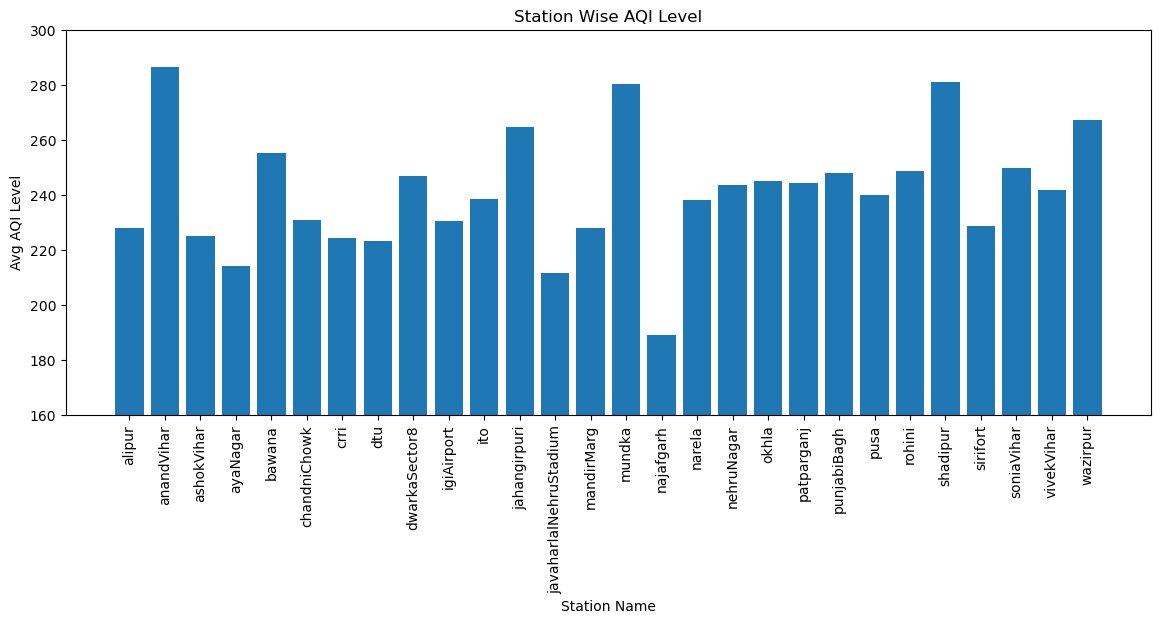

In [87]:
plt.figure(figsize=(14,5))
plt.bar(data_station['Location'], data_station['AQI'])
plt.xlabel('Station Name')
plt.ylabel('Avg AQI Level')
plt.xticks(rotation=90)
plt.ylim((160,300))
plt.title('Station Wise AQI Level');

<span style='font-size:16px'>* The graph shows the average AQI levels across different stations in Delhi for 2023.  
<span style='font-size:16px'>* Some stations, like Anand Vihar and Shadipur, have the highest pollution levels, while others, such as Aya Nagar and Najafgarh, have relatively lower AQI levels. This indicates varying air quality across different locations in the city.